In [1]:
# Set up
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn

path = '/home/kyle/Documents/thomaskh522@gmail.com/SMU/DataMining/Project_Data/'

#show files
os.listdir(path)

['FaultCode_DowntimeMapping.xlsx',
 'tblAlarm.csv',
 'Reference',
 'tblGrid.csv',
 'tblCSTurTemp.csv',
 'PowerCurves.csv',
 'tblStation.csv',
 'Siemens_Fault_Code_Descriptions.xlsx',
 'LGW_Down_Turbine_Tracker.xlsx',
 'WTG.csv',
 'MetTower_LGW_2017.csv',
 'PowerCurveData.csv',
 'tblSCTurbine.csv',
 'Siemens Info File_V30_VS_140708_R1 00.xls',
 'Lightning.csv',
 'WpsHistoryDescription_V_310.pdf',
 'MetTower_LGW_2016.csv',
 'PFs_Pattern_March22_TQP.pdf',
 'tblSCTurPress.csv',
 'PartsConsumption.csv',
 'MetTower_LGW_2018.csv',
 'Siemens Database Tag List.xlsx',
 'Logans Gap Component Configuration.xlsx',
 'WPP.csv',
 'Siemens Error Code Stop and Reset Details.xlsx',
 'tblDailySummary.csv',
 'Pattern Data Requirements.xlsx',
 'TurbineModels.csv']

# Turbine Models
First I wanted to understand what the turbines were like at Logan's Gap. Below is a print out of the raw data. In addition, I have used shown the descriptive statistics for the numeric data assocaited for each numeric feature

In [2]:
# First I want to understand turbine models
df_tubine = pd.read_csv(path + 'TurbineModels.csv')
print(df_tubine)
df_tubine.describe()

    WTG_Model_ID  OEM_ID   WTG_Model_Name  Rotor_Diameter_m  Blade_Length_m  \
0              1       1       SWT 2.3-93              93.0            45.0   
1              2       1      SWT 2.3-101             101.0            49.0   
2              3       1      SWT 2.3-108             108.0            53.0   
3              4       2       MWT 95/2.4              95.0            46.2   
4              5       3       GE 1.85-87              87.0            42.0   
5              6       3  GE 1.5-82.5 xle              82.5            40.0   
6              7       2        MWT 1000A              61.4            29.5   
7              8       3      GE 2.75-120             120.0             NaN   
8              9       3       GE 3.2-103             103.0             NaN   
9             10       1   SWT 3.2-120 DD             120.0             NaN   
10            11       4      G114 2.1 MW             114.0             NaN   

    Cut_in_Wind_Speed  Cut_out_Wind_Speed  
0      

,WTG_Model_ID,OEM_ID,Rotor_Diameter_m,Blade_Length_m,Cut_in_Wind_Speed,Cut_out_Wind_Speed
count,11.000000,11.000000,11.000000,7.000000,10.000000,9.000000
mean,6.000000,2.181818,98.627273,43.528571,3.100000,23.666667
std,3.316625,1.078720,17.574077,7.533639,0.316228,2.179449
min,1.000000,1.000000,61.400000,29.500000,2.500000,20.000000
25%,3.500000,1.000000,90.000000,41.000000,3.000000,23.000000
50%,6.000000,2.000000,101.000000,45.000000,3.000000,25.000000
75%,8.500000,3.000000,111.000000,47.600000,3.375000,25.000000
max,11.000000,4.000000,120.000000,53.000000,3.500000,25.000000


# Power Curves
## Read in the data, and show a small subset to get an idea of the data structure

In [4]:
# Next lets look at the power curves
df_pc = pd.read_csv(path + 'PowerCurveData.csv')
df_pc.head()

,ID,Ref_Curve_ID,Wind_Speed,Active_Power_kW
0,1,1,0.0,0.0
1,2,1,0.5,0.0
2,3,1,1.0,0.0
3,4,1,1.5,0.0
4,5,1,2.0,0.0


# Power Curves
## Plotting Power Curves
Below is a function that can take either a single turbine number, a list of numbers, or the string variable "all". If a single number is entered, the power curve for that reference ID is plotted. If a list of numbers are entered, then the power curve for each referenc ID is plotted. If "all" is entered then all of the power curves are plotted.

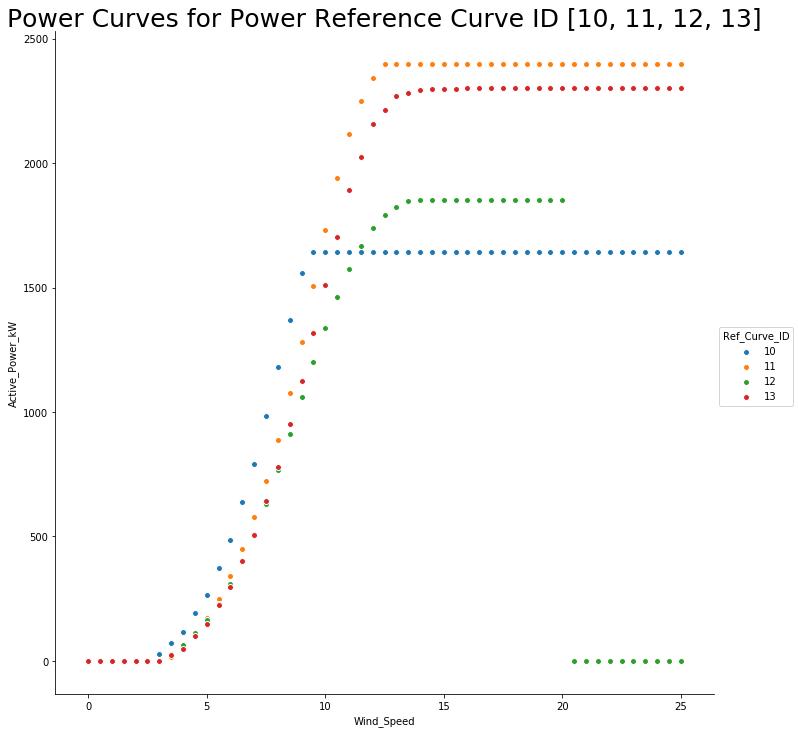

In [5]:
def plot_power_curve(selection):
    if selection != "all":
        if type(selection) == list:
            this = df_pc[df_pc["Ref_Curve_ID"].isin(selection)]
            sbn.pairplot(x_vars=["Wind_Speed"], y_vars=["Active_Power_kW"], data=this, size=10, hue='Ref_Curve_ID')
            plt.title("Power Curves for Power Reference Curve ID {}".format(selection), size=25)             
        else:
            this = df_pc[df_pc["Ref_Curve_ID"] == selection]
            sbn.pairplot(x_vars=["Wind_Speed"], y_vars=["Active_Power_kW"], data=this, size=10)
            plt.title("Power Curves for Power Reference Curve ID {}".format(selection), size=25)
                    
    else:
        sbn.pairplot(x_vars=["Wind_Speed"], y_vars=["Active_Power_kW"], data=df_pc, size=10, hue='Ref_Curve_ID')
        plt.title("Power Curves by Curve ID", size=25)
        
#show some power curves
plot_power_curve([10,11,12,13])

# Power Curves
# Understanding Cutout Speed

In [6]:
# Based on the above we see turbine 12 powe output is 0 above 20 MPH
# lets show all turbines that make 0 kW at high windspeeds
df_cutout = df_pc[(df_pc["Wind_Speed"] > 15) & (df_pc["Active_Power_kW"] == 0)]
df_cutout

,ID,Ref_Curve_ID,Wind_Speed,Active_Power_kW
602,603,12,20.5,0.0
603,604,12,21.0,0.0
604,605,12,21.5,0.0
605,606,12,22.0,0.0
606,607,12,22.5,0.0
607,608,12,23.0,0.0
608,609,12,23.5,0.0
609,610,12,24.0,0.0
610,611,12,24.5,0.0
611,612,12,25.0,0.0


# Power Curves
## Creating an average power curve for Logan's Gap
The data was grouped by wind speed, and then an average power curve was created using the aggregated data. Tabular and graphical output is shown below

In [7]:
# Now lets make an avearage for the profiles
df_windGroup = df_pc.groupby("Wind_Speed", as_index=False)
avg_power = df_windGroup.mean()
avg_power

,Wind_Speed,ID,Ref_Curve_ID,Active_Power_kW
0,0.0,976.384615,20.307692,0.000000
1,0.5,977.384615,20.307692,0.000000
2,1.0,978.384615,20.307692,0.000000
3,1.5,979.384615,20.307692,0.000000
4,2.0,980.384615,20.307692,0.000000
5,2.5,981.384615,20.307692,3.448718
6,3.0,982.384615,20.307692,26.897436
7,3.5,983.384615,20.307692,68.664103
8,4.0,984.384615,20.307692,112.174359
9,4.5,985.384615,20.307692,182.016667


Text(0.5,1,"Average Power Curve for Logan's Gap")

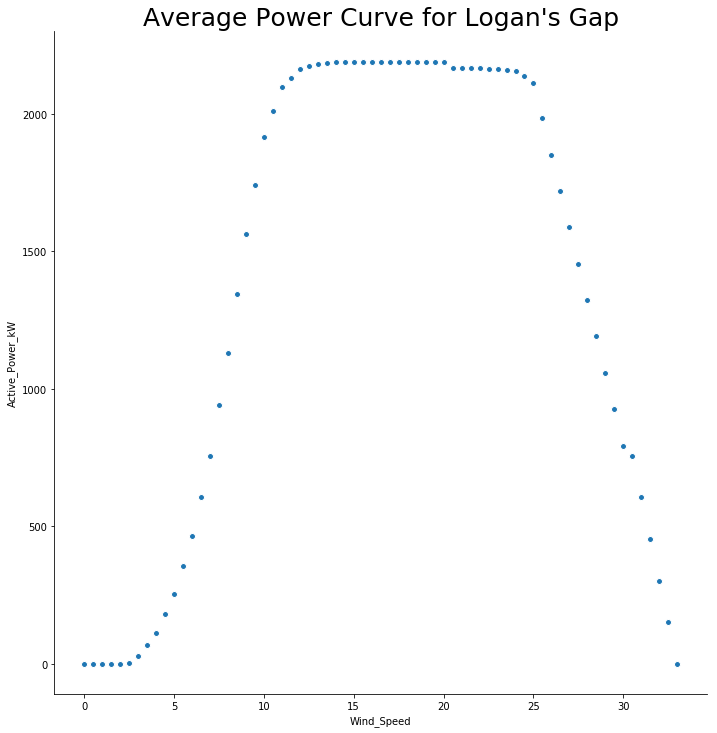

In [8]:
sbn.pairplot(x_vars=["Wind_Speed"], y_vars=["Active_Power_kW"], data=avg_power, size=10)
plt.title("Average Power Curve for Logan's Gap", size=25)

# Moving Forward
The previous data set did not meet the complexity requirements, however, there was still very valuable information in that dataset. We can use the power curve information to compare turbine opeartion to its theoretical operation. Next I will look at one or two other data sets that meet the complexity requrements.

## Investigation of tblSCTurbine.csv
This dataset is over 4 GB in size. It cannot be read into memory on my machine. To start, I will only read in 100,000 lines of data to get an idea of the underlying structure. We may move to a spark installation so that we can handle such a large ammount of data.

In [9]:
df_main = pd.read_csv(path + "tblSCTurbine.csv", nrows=100000)
df_main.head()

,Name,TimeStamp,wtc_CurTime_endvalue,wtc_SecAnemo_mean,wtc_YawPos_mean,wtc_GenRpm_mean,wtc_HubLubGr_mean,wtc_IceDetec_mean,wtc_IMidBa_mean,wtc_IMidCa_mean,...,wtc_ReactRef_endvalue,wtc_ScYawPos_mean,wtc_PrWindSp_mean,wtc_SeWindSp_mean,wtc_AcWindSp_mean,wtc_NacelPos_mean,wtc_TetAnemo_mean,wtc_TetAnFrq_mean,wtc_TowerFrq_Frequenc_mean,wtc_BoostAva_mean
0,T010,2015-05-19 23:00:00.000,2015-05-19 22:59:56.000,8.026840,40.70000,0.6,NaN,NaN,NaN,NaN,...,NaN,40.70000,9.485412,8.017353,9.485392,40.70000,NaN,0.01,0.2004,0.0
1,T010,2015-05-19 23:10:00.000,2015-05-19 23:09:56.000,8.709124,12.69578,0.6,NaN,NaN,NaN,NaN,...,NaN,10.96358,8.437153,8.697805,8.437179,12.70296,NaN,0.01,0.2004,0.0
2,T010,2015-05-19 23:20:00.000,2015-05-19 23:19:56.000,10.432920,311.68360,0.6,NaN,NaN,NaN,NaN,...,NaN,68.03295,10.836880,10.431380,10.836890,311.68570,NaN,0.01,0.2004,0.0
3,T010,2015-05-19 23:30:00.000,2015-05-19 23:29:56.000,8.176679,164.15750,0.6,NaN,NaN,NaN,NaN,...,NaN,-194.58410,9.402458,8.174048,9.402458,164.16360,NaN,0.01,0.2004,0.0
4,T010,2015-05-19 23:40:00.000,2015-05-19 23:39:56.000,8.793220,151.80000,0.6,NaN,NaN,NaN,NaN,...,NaN,-208.20000,9.098410,8.795180,9.098390,151.80000,NaN,0.01,0.2004,0.0


In [12]:
#How many unique turbines are there? 37 
df_main['Name'].unique()


array(['T010', 'T006', 'T007', 'T011', 'T013', 'T008', 'T009', 'T019',
       'T012', 'T014', 'T017', 'T001', 'T002', 'T003', 'T004', 'T015',
       'T018', 'T016', 'T005', 'T020', 'T039', 'T040', 'T041', 'T049',
       'T050', 'T054', 'T021', 'T052', 'T023'], dtype=object)

In [14]:
# What are the columns
print(df_main.columns)

Index(['Name', 'TimeStamp', 'wtc_CurTime_endvalue', 'wtc_SecAnemo_mean',
       'wtc_YawPos_mean', 'wtc_GenRpm_mean', 'wtc_HubLubGr_mean',
       'wtc_IceDetec_mean', 'wtc_IMidBa_mean', 'wtc_IMidCa_mean',
       'wtc_IMidAa_mean', 'wtc_MainSRpm_mean', 'wtc_PitchRef_mean',
       'wtc_PitchRef_BladeA_mean', 'wtc_PitchRef_BladeB_mean',
       'wtc_PitchRef_BladeC_mean', 'wtc_PitcRefA_mean', 'wtc_PriAnemo_mean',
       'wtc_PWMBa_mean', 'wtc_PWMCa_mean', 'wtc_PWMAa_mean',
       'wtc_HubAnIn5_mean', 'wtc_HubAnIn6_mean', 'wtc_HubAnIn7_mean',
       'wtc_NacHumid_mean', 'wtc_TwrHumid_mean', 'wtc_VisMeter_endvalue',
       'wtc_PitcPosA_mean', 'wtc_PitcPosB_mean', 'wtc_PitcPosC_mean',
       'wtc_PowerRef_endvalue', 'wtc_ReactRef_endvalue', 'wtc_ScYawPos_mean',
       'wtc_PrWindSp_mean', 'wtc_SeWindSp_mean', 'wtc_AcWindSp_mean',
       'wtc_NacelPos_mean', 'wtc_TetAnemo_mean', 'wtc_TetAnFrq_mean',
       'wtc_TowerFrq_Frequenc_mean', 'wtc_BoostAva_mean'],
      dtype='object')


In [36]:
# Lets see how some of this data correlated
df_main.corr()
#There is a lot of NA data. I will drop columns with NA to see what happens.

,wtc_SecAnemo_mean,wtc_YawPos_mean,wtc_GenRpm_mean,wtc_HubLubGr_mean,wtc_IceDetec_mean,wtc_IMidBa_mean,wtc_IMidCa_mean,wtc_IMidAa_mean,wtc_MainSRpm_mean,wtc_PitchRef_mean,...,wtc_ReactRef_endvalue,wtc_ScYawPos_mean,wtc_PrWindSp_mean,wtc_SeWindSp_mean,wtc_AcWindSp_mean,wtc_NacelPos_mean,wtc_TetAnemo_mean,wtc_TetAnFrq_mean,wtc_TowerFrq_Frequenc_mean,wtc_BoostAva_mean
wtc_SecAnemo_mean,1.000000e+00,-8.272123e-02,4.986059e-01,NaN,NaN,NaN,NaN,NaN,4.986290e-01,NaN,...,NaN,8.154370e-02,7.668186e-01,9.999979e-01,8.373585e-01,-8.270651e-02,NaN,1.502009e-14,1.478245e-01,9.901547e-02
wtc_YawPos_mean,-8.272123e-02,1.000000e+00,5.386099e-02,NaN,NaN,NaN,NaN,NaN,5.384951e-02,NaN,...,NaN,1.085599e-01,-4.581449e-03,-8.271703e-02,3.120802e-03,9.999331e-01,NaN,-2.586316e-14,-6.771574e-02,5.862956e-03
wtc_GenRpm_mean,4.986059e-01,5.386099e-02,1.000000e+00,NaN,NaN,NaN,NaN,NaN,9.999973e-01,NaN,...,NaN,1.036879e-01,5.699439e-01,4.986140e-01,5.638399e-01,5.385389e-02,NaN,-8.762689e-14,3.247868e-01,7.692995e-02
wtc_HubLubGr_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_IceDetec_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_IMidBa_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_IMidCa_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_IMidAa_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_MainSRpm_mean,4.986290e-01,5.384951e-02,9.999973e-01,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,...,NaN,1.036544e-01,5.699597e-01,4.986371e-01,5.638593e-01,5.384265e-02,NaN,4.543671e-14,3.249945e-01,7.692752e-02
wtc_PitchRef_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'Correlation Heat Map of all Data')

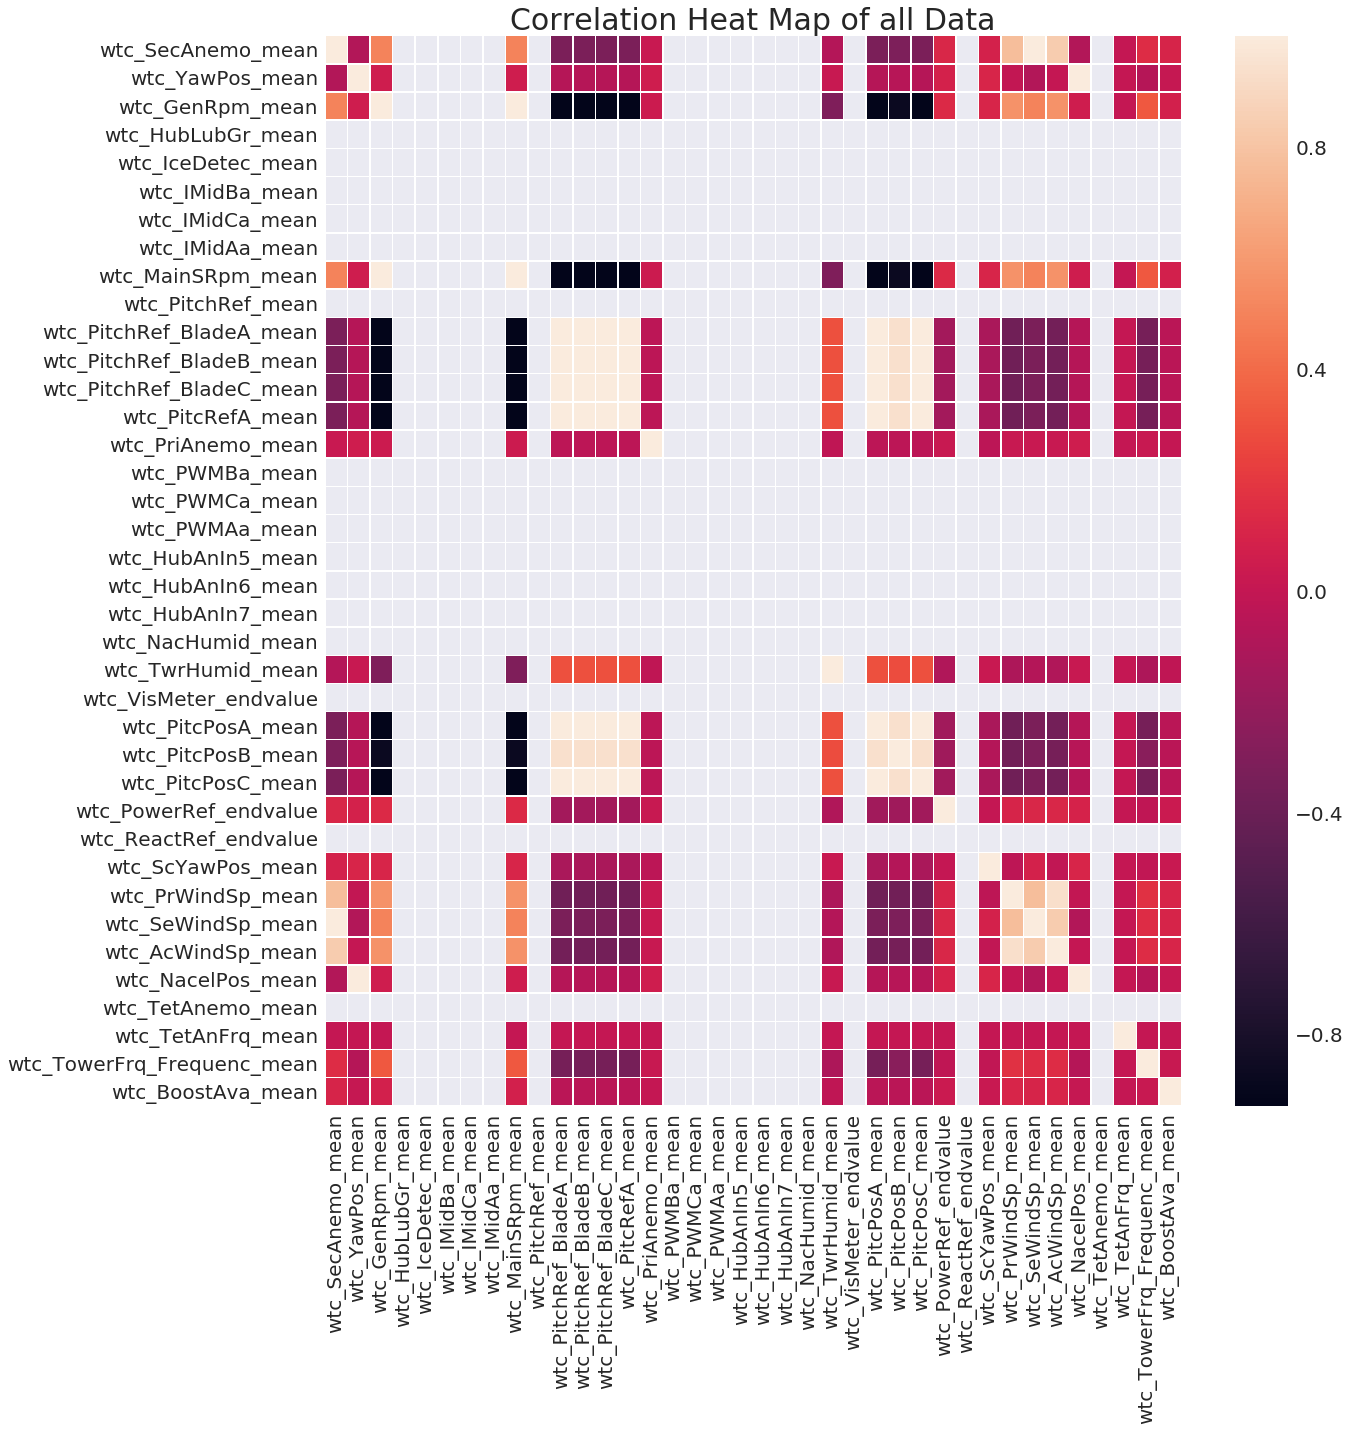

In [58]:
# plot the correlation matricies
sbn.set(font_scale=2)
f, ax = plt.subplots(figsize=(20, 20)) #taken from Notebook 2: DataVisualization
sbn.heatmap(df_main.corr(), linewidths=0.5)
f.tight_layout()
plt.title("Correlation Heat Map of all Data", size=30)

vals = df_main[]